In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [27]:
# Loading data
data = pd.read_csv('./data_sets/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', sep=',', engine='python')

In [ ]:
# # Split data into train and test sets
# np.random.seed(42)

# # Split into train & test set
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.2)

In [26]:
# Prepare data
# data
# data[data['Country Name'] == 'Thailand']
th = data[data['Country Name'] == 'Thailand'].drop(['Country Name','Country Code','Indicator Name','Indicator Code'], axis=1)
th

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
231,2.760747e+09,3.034044e+09,3.308913e+09,3.540403e+09,3.889130e+09,4.388938e+09,5.279231e+09,5.638461e+09,6.081009e+09,6.695337e+09,...,2.913830e+11,2.817100e+11,3.411050e+11,3.708190e+11,3.975580e+11,4.203330e+11,4.073390e+11,4.013990e+11,4.117550e+11,4.552210e+11


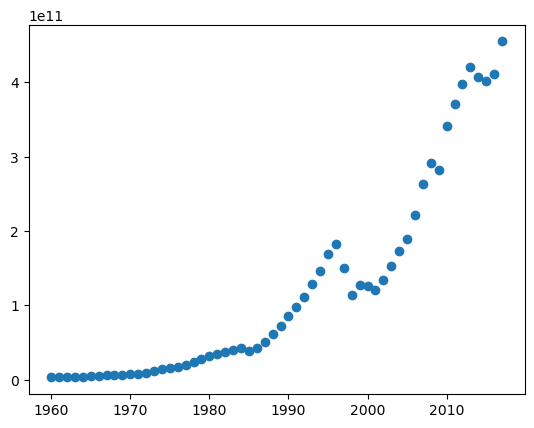

In [24]:
th_T = th.T
y = th_T.values.tolist()
x=np.arange(1960,1960+58).reshape(-1,1)
plt.scatter(x,y)

# Linear Regression

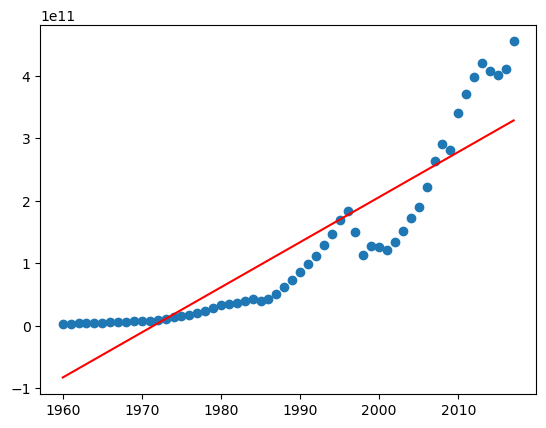

In [39]:
# Let's create Model

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

y_pre = lin_reg.predict(x)
plt.plot(x,y_pre,"r-")
plt.scatter(x,y)

In [48]:
x

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017]])

## forecast

In [57]:
target_lists = np.arange(start=2018, stop=2030, step=1)
target_lists

array([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028,
       2029])

In [61]:
x_predict = [[x] for x in target_lists]
x_predict

[[2018],
 [2019],
 [2020],
 [2021],
 [2022],
 [2023],
 [2024],
 [2025],
 [2026],
 [2027],
 [2028],
 [2029]]

In [73]:
y_predict

array([[3.35971268e+11],
       [3.43199310e+11],
       [3.50427352e+11],
       [3.57655394e+11],
       [3.64883436e+11],
       [3.72111479e+11],
       [3.79339521e+11],
       [3.86567563e+11],
       [3.93795605e+11],
       [4.01023648e+11],
       [4.08251690e+11],
       [4.15479732e+11]])

In [72]:
# np.append(x, x_predict)
# np.append(y, y_predict)

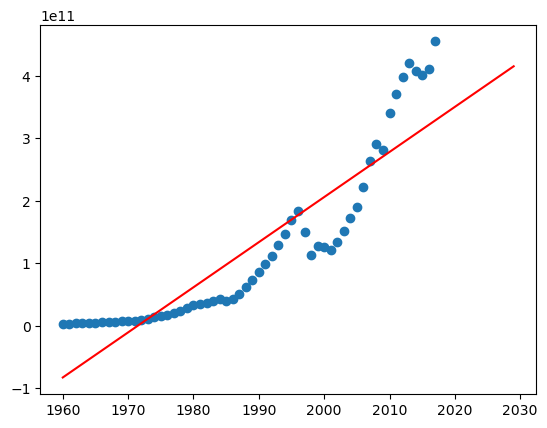

In [71]:
# Test prediction
y_predict = lin_reg.predict(x_predict)
plt.plot(np.append(x, x_predict),np.append(y_pre, y_predict),"r-")
plt.scatter(x,y)

In [ ]:
y_predict

# Poly Regrssion

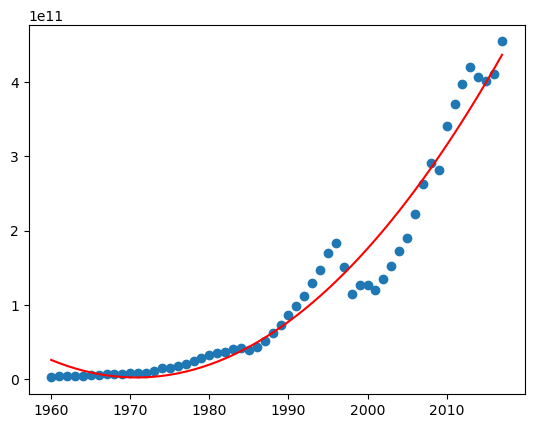

In [79]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X=poly_features.fit_transform(x)
lin_reg.fit(X, y)
y_pre = lin_reg.predict(X)
plt.plot(x,y_pre,"r-")
plt.scatter(x,y)

## forecast

In [86]:
X_predict = poly_features.fit_transform(x_predict)
X_predict

array([[2.018000e+03, 4.072324e+06],
       [2.019000e+03, 4.076361e+06],
       [2.020000e+03, 4.080400e+06],
       [2.021000e+03, 4.084441e+06],
       [2.022000e+03, 4.088484e+06],
       [2.023000e+03, 4.092529e+06],
       [2.024000e+03, 4.096576e+06],
       [2.025000e+03, 4.100625e+06],
       [2.026000e+03, 4.104676e+06],
       [2.027000e+03, 4.108729e+06],
       [2.028000e+03, 4.112784e+06],
       [2.029000e+03, 4.116841e+06]])

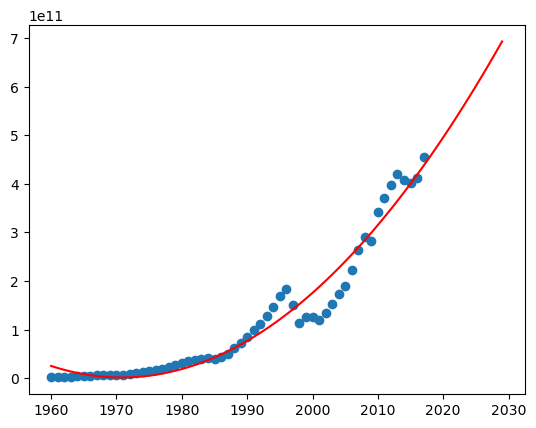

In [87]:
# Test prediction
y_predict = lin_reg.predict(X_predict)
plt.plot(np.append(x, x_predict),np.append(y_pre, y_predict),"r-")
plt.scatter(x,y)

In [88]:
y_predict

array([[4.56292006e+11],
       [4.75756055e+11],
       [4.95627972e+11],
       [5.15907755e+11],
       [5.36595406e+11],
       [5.57690923e+11],
       [5.79194307e+11],
       [6.01105558e+11],
       [6.23424676e+11],
       [6.46151661e+11],
       [6.69286512e+11],
       [6.92829231e+11]])